In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv("carevaluation.csv")

In [3]:
data.head()

,Buying,M. Cost,Doors,Persons,Leg Boot,Safety,Outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.shape

(1728, 7)

In [5]:
data.isnull().sum()

Buying      0
M. Cost     0
Doors       0
Persons     0
Leg Boot    0
Safety      0
Outcome     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
enc=LabelEncoder()

In [8]:
data.columns=['Buying','Mcost','Doors','persons','Legboot','Safety','Outcome']

In [9]:
data.columns

Index(['Buying', 'Mcost', 'Doors', 'persons', 'Legboot', 'Safety', 'Outcome'], dtype='object')

In [11]:
data.Buying=enc.fit_transform(data.Buying)
data.Mcost=enc.fit_transform(data.Mcost)
data.Doors=enc.fit_transform(data.Doors)
data.persons=enc.fit_transform(data.persons)
data.Legboot=enc.fit_transform(data.Legboot)
data.Safety=enc.fit_transform(data.Safety)
data.Outcome=enc.fit_transform(data.Outcome)




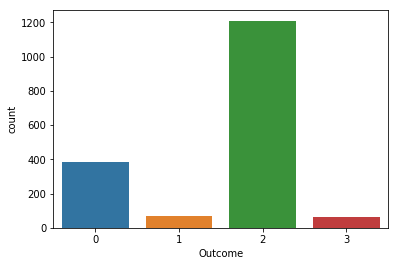

In [12]:
sb.countplot(data.Outcome)

In [13]:
data.head()

,Buying,Mcost,Doors,persons,Legboot,Safety,Outcome
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [14]:
X=data.iloc[:,:6]
y=data.Outcome

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=10)

In [17]:
from sklearn.svm import SVC

In [35]:
model=SVC(C=1000,gamma=0.1,kernel='rbf')

In [36]:
model.fit(X_train,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
predict=model.predict(X_test)

In [38]:
predict

array([2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 3, 1, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2,
       0, 0, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 3, 2, 2, 0, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 3, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 3, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2])

In [39]:
y_test

954     2
115     2
1422    2
35      2
1579    1
372     2
859     0
233     0
510     2
1334    0
750     2
130     2
267     2
211     2
427     0
689     0
1622    2
1570    2
69      2
1158    2
1323    2
1277    2
539     2
518     2
1328    2
1085    2
1185    2
1040    0
1680    2
1059    2
       ..
1000    2
1405    2
695     0
881     0
34      2
1308    2
1410    2
1708    2
1688    3
1008    2
903     2
1693    0
573     2
986     0
567     2
1177    0
1521    2
87      2
963     2
217     2
120     2
1016    0
1408    2
359     2
24      2
1102    0
1109    2
784     2
808     0
326     2
Name: Outcome, Length: 260, dtype: int32

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,predict)

1.0

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters=[{'kernel':['linear'],'C':[1,10,100,1000,10000]},
           {'kernel':['rbf'],'gamma':[0.5,0.1,0.05,0.07,0.08],'C':[1,10,100,1000,10000]}]

In [44]:
grid_model_svc=GridSearchCV(SVC(),parameters)

In [45]:
grid_model_svc.fit(X_train,y_train)

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000, 10000]}, {'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.05, 0.07, 0.08], 'C': [1, 10, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
grid_model_svc.best_score_

0.9863760217983651

In [47]:
grid_model_svc.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}